In [15]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('ggplot')
%matplotlib inline
import json


In [16]:
from scipy.interpolate import interp1d
import pandas as pd
import numpy as np

Results

Name    | length | edit rate | HC (edited) | HC (not edited) | P-value
-----------------------------------------------------------------
Airpods   |   54 | 14% | 1.8186 |  1.034 | 0.012
Civil War |  322 | 6%  |   1.05 |  -0.18 | 0.21
Armenia   |  262 | 13% |  1.927 |  -0.35 | 0.02
Bowie     |   70 | 13% | 3.3789 |  -1.14 | 0.0001
Dali      |  206 |  8% |   3.48 |   2.95 | 0.006

In [32]:
results_filename = "out.csv"
df = pd.read_csv("out.csv")
df['len'] = df.sentence.apply(lambda x : len(x.split()))
df[df['mask']].sort_values('pvalue')


,Unnamed: 0,sentence,response,pvalue,context,comment,mask,tag,len
38,38,The adoption of Christianity led to the creati...,4.622060,0.008213,NaN,OK,True,not edit,24
27,27,"According to legend, the warrior-founder Hayk ...",4.970569,0.009519,NaN,OK,True,<edit>,23
200,200,"As of December 2015, Armenia is a unitary parl...",4.164604,0.009782,NaN,OK,True,<edit>,23
203,203,Following the 2021 Armenian parliamentary elec...,4.839377,0.010494,NaN,OK,True,<edit>,20


In [38]:
df.head()

,k,average_bits_per_key_phrase
0,1,26.766063
1,2,20.710268
2,3,17.902109
3,4,16.052411
4,5,14.746791


<Axes: xlabel='k'>

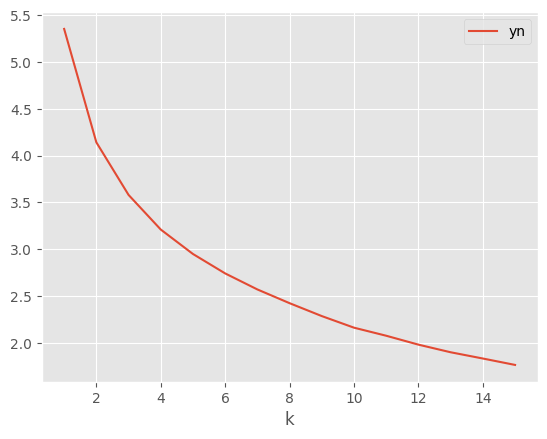

In [40]:
df = pd.read_csv("~/Downloads/average_entropies_of_phrases_at_k.csv")
df['yn'] = df['average_bits_per_key_phrase'] / 5
df.plot(x='k', y='yn')

In [33]:
df[df['tag'] == '<edit>'].sort_values('pvalue')

,Unnamed: 0,sentence,response,pvalue,context,comment,mask,tag,len
27,27,"According to legend, the warrior-founder Hayk ...",4.970569,0.009519,NaN,OK,True,<edit>,23
200,200,"As of December 2015, Armenia is a unitary parl...",4.164604,0.009782,NaN,OK,True,<edit>,23
203,203,Following the 2021 Armenian parliamentary elec...,4.839377,0.010494,NaN,OK,True,<edit>,20
224,224,"Mesrop Mashtots created the alphabet, which he...",4.749608,0.014330,NaN,OK,False,<edit>,34
151,151,Its borders contain two terrestrial ecoregions...,4.854792,0.018700,NaN,OK,False,<edit>,16
100,100,The Treaty of Sevres sought to affirm the exis...,4.385006,0.025548,NaN,OK,False,<edit>,21
62,62,Armenians under Ottoman rule were allowed sign...,4.318030,0.033695,NaN,OK,False,<edit>,19
72,72,The Russian government encouraged the return o...,4.236797,0.036404,NaN,OK,False,<edit>,19
91,91,The event is commemorated each year on 24 Apri...,4.466344,0.071363,NaN,OK,False,<edit>,13
101,101,"However, Turkish Nationalists declared themsel...",3.941420,0.171873,NaN,OK,False,<edit>,18


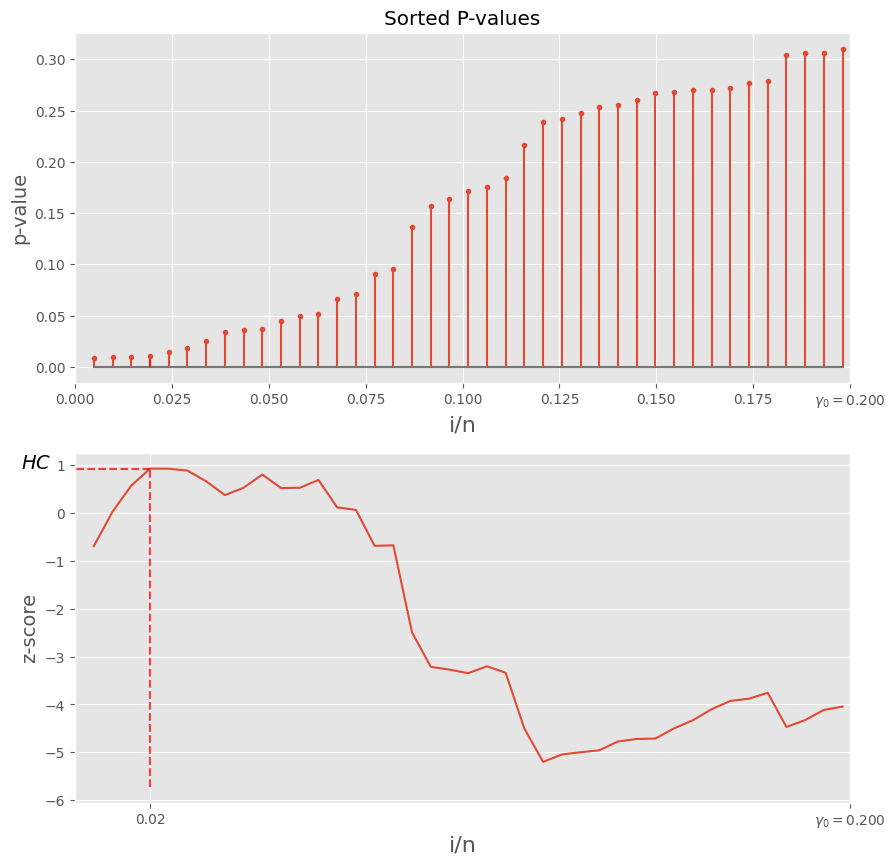

In [34]:
from multitest import MultiTest

pvals = df['pvalue']
mt = MultiTest(pvals[~np.isnan(pvals)], stbl=True)
mt.hc_dashboard()

In [67]:
# load perplexity detector
from src.PerplexityEvaluator import PerplexityEvaluator
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

lm_name = 'gpt2'
tokenizer = AutoTokenizer.from_pretrained(lm_name)
model = AutoModelForCausalLM.from_pretrained(lm_name)

device = 'mps' if torch.backends.mps.is_available() else 'cpu'
model.to(device)

sentence_detector = PerplexityEvaluator(model, tokenizer)

In [80]:
from text_detect import get_survival_function
import yaml

conf_file = "conf.yml"
with open(conf_file, "r") as stream:
    try:
        params = yaml.safe_load(stream)
    except yaml.YAMLError as exc:
        print(exc)

null_data_file = params['no-context-null-data-file']
lm_name = params['language-model-name']

df_null = pd.read_csv(null_data_file)

max_tokens_per_sentence = params['max-tokens-per-sentence']
min_tokens_per_sentence = params['min-tokens-per-sentence']

if params['ignore-first-sentence']:
    df_null = df_null[df_null.num > 1]

pval_functions = get_survival_function(df_null, G=params['number-of-interpolation-points'])

/Users/kipnisal/Dropbox/Research/AuthorshipAI/env/lib/python3.8/site-packages/multitest/MultiTest.py:59: RuntimeWarning: invalid value encountered in sqrt
  denom = np.sqrt(self._pvals * (1 - self._pvals))


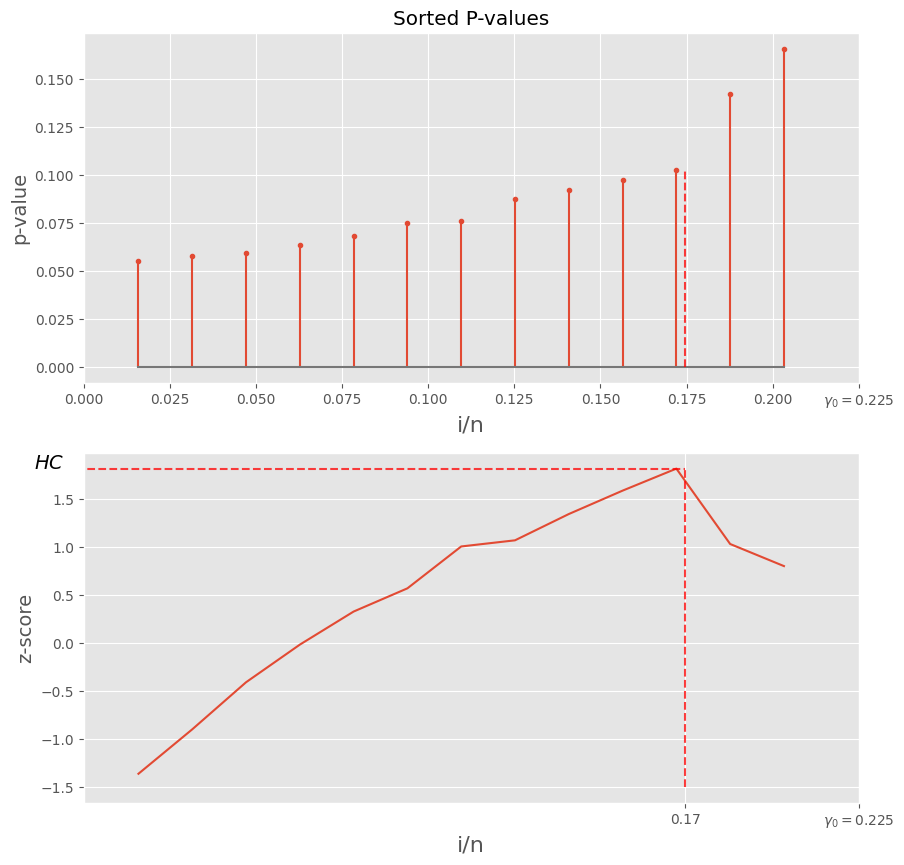

In [5]:
df0 =
hc95 = df0['hc'].quantile(0.95)
hc975 = df0['hc'].quantile(0.975)
fisher005 = df0['fisher_pval'].quantile(0.05)
fisher0025 = df0['fisher_pval'].quantile(0.025)

print("HC95 = ", hc95)
print("HC975 = ", hc975)
print("fisher_pval005 = ", fisher005)
print("fisher_pval0025 = ", fisher0025)


NameError: name 'df0' is not defined

In [92]:
print("HC discoveries: ", np.mean(df.hc > hc95))
print("Fisher discoveries: ", np.mean(df.fisher_pval < fisher005))
print("Combined: ", np.mean( (df.hc > hc975) | (df.fisher_pval < fisher0025) ))
print("FD rate: ", np.mean(df.FDP))
print("TD rate: ", np.mean(df.TDP))


HC null discoveries:  0.05102040816326531
Fisher null discoveries:  0.0
HC discoveries:  0.9796954314720813
Fisher discoveries:  0.4365482233502538
Combined:  0.9847715736040609
FD rate:  0.3344527811119749
TD rate:  0.6545723850869264


0.030153015301530153